# Step 1 : Initial exploration of the Dataset

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
% ls Desktop


 Volume in drive C is Windows8_OS
 Volume Serial Number is 8C1B-710B

 Directory of C:\Users\asburysean\Desktop

05/07/2019  02:56 PM    <DIR>          .
05/07/2019  02:56 PM    <DIR>          ..
02/15/2019  06:58 PM             1,218 ASIO4ALL v2 Instruction Manual.lnk
12/10/2015  07:58 PM            14,186 Ba 212.xlsx
09/26/2016  11:14 PM             1,310 Dropbox.lnk
05/07/2019  02:45 PM    <DIR>          Indicators.csv
10/08/2015  02:12 PM             1,104 Internet Explorer.lnk
05/22/2018  02:42 PM             1,417 Microsoft Edge.lnk
04/16/2019  05:49 AM         1,567,306 ODE.jpg
04/10/2015  10:13 AM            12,750 Power Elite.docx
04/15/2019  12:19 PM         8,370,931 sd-3layers.jpg
04/24/2015  10:43 AM           507,857 Soc 204 Dispossessed Assignment 2 W15.docx
01/25/2018  01:09 PM             1,886 Spotify.lnk
              10 File(s)     10,479,965 bytes
               3 Dir(s)  98,093,117,440 bytes free


In [3]:
% ls Desktop\Indicators.csv\Indicators.csv\

 Volume in drive C is Windows8_OS
 Volume Serial Number is 8C1B-710B

 Directory of C:\Users\asburysean\Desktop\Indicators.csv

05/07/2019  02:46 PM       574,305,253 Indicators.csv
               1 File(s)    574,305,253 bytes
               0 Dir(s)  98,092,806,144 bytes free


In [5]:
data = pd.read_csv('.\Desktop\Indicators.csv\Indicators.csv')
data.shape

(5656458, 6)

This is a really large dataset, at least in terms of the number of rows. But with 6 columns, what does this hold?

In [6]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


Looks like it has different indicators for different countries with the year and value of the indicator.

## How many UNIQUE country names are there?

In [7]:
countries = data['CountryName'].unique().tolist()
len(countries)

247

## Are there same number of country codes?

In [8]:
# How many unique country codes are there? (should be the same #)
countryCodes = data['CountryCode'].unique().tolist()
len(countryCodes)

247

## Are there many or few indicators?

In [9]:
# How many unique indicators are there? (should be the same #)
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

## How many years of data do we have?

In [10]:
# How many years of data do we have?
years = data['Year'].unique().tolist()
len(years)

56

## What is the range of years?

In [11]:
print(min(years), "to ",max(years))

1960 to  2015


# Matplotlib: Basic Plotting, Part 1

## Lets pick a country and an indicator to explore: CO2 Emissions per capita and the USA

In [12]:
# select CO2 emissions for the United States
hist_indicator = 'CO2 emissions \(metric'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators mathcing the USA for country code and Co2 emissions per capita for indicator
stage = data[mask1 & mask2]

In [13]:
stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119


## Let's see how emissions have changed over time using MatplotLib

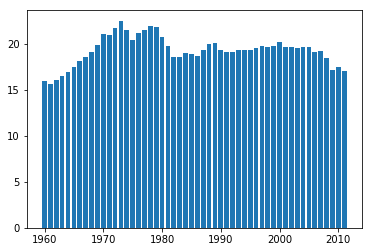

In [14]:
# get the years
years = stage['Year'].values
# get the values
co2 = stage['Value'].values

# create
plt.bar(years,co2)
plt.show()

Turns out emissions per capita have dropped a bit over time, but let's make this graphic a bit more appealing before we continue to explore it.

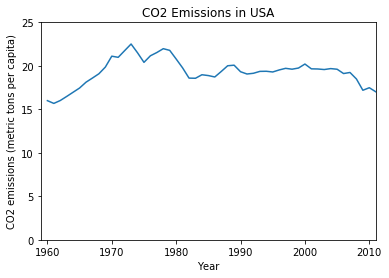

In [15]:
# switch to a line plot
plt.plot(stage['Year'].values, stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

#label the figure
plt.title('CO2 Emissions in USA')

#to make it ore honest start the y axis at 0

plt.axis([1959,2011,0,25])

plt.show()

## Using Histograms to explore the distribution of values

We could also visualize this data as a histogram to better explore the ranges of values in CO2 production per year.

In [16]:
# If you want to just include those within one standard deviation of the mean
#Lower = stage['Value'].mean() - stage['Value'].std()
#Upper = stage['Value'].mean() + stage['Value'].std()
#hist_data = [x for x in stage[:10000] if x>Lower and x<Upper].values

# Otherwise, Let's look at all the data
hist_data = stage['Value'].values

In [17]:
print(len(hist_data))

52


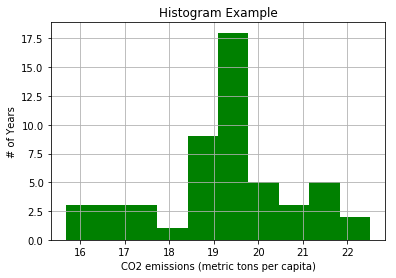

In [18]:
# the histogram of the data
plt.hist(hist_data, 10, normed=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True)

plt.show()

So the USA has many years where it produced between 19-20 metric tons per capitia with outliers on either side.

## But how do the USA's numbers relate to those of other countires?

In [19]:
# select CO@ emissions for all countires in 2011
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask1 - data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['Year'].isin([hist_year])

# apply our mask
co2_2011 = data[mask1 & mask2]
co2_2011.head()

C:\Users\asburysean\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:183: UserWarning: evaluating in Python space because the '-' operator is not supported by numexpr for the bool dtype, use '^' instead
  unsupported[op_str]))


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


For how many countires do we have CO2 per capita emissions data in 2011

In [20]:
print(len(co2_2011))

232


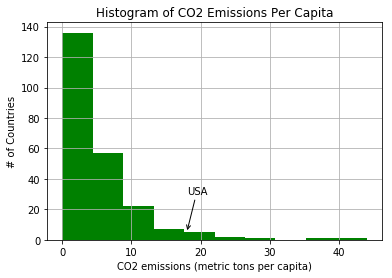

In [21]:
# Let's plot a histogram of the emissions per capita by country 

# subplots returns a touple with the figure, axis attributes
fig, ax = plt.subplots()

ax.annotate("USA",
            xy=(18, 5), xycoords='data',
            xytext=(18, 30), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
           )
plt.hist(co2_2011['Value'], 10 , normed=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions Per Capita')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

# Matplotlib: Basic Plotting, Part 2

## Relationship between GDP and CO2 Emissions in USA

In [24]:
# select GDP Per capita emissions for the United States
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'USA'

mask1 = data['IndicatorName'].str.contains(hist_indicator)
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and GDP per capita for Indicator Name
gdp_stage = data[mask1 & mask2]

#plot gdp_stage vs stage

In [25]:
gdp_stage.head(2)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22282,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,15482.707760
48759,United States,USA,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,15578.409657


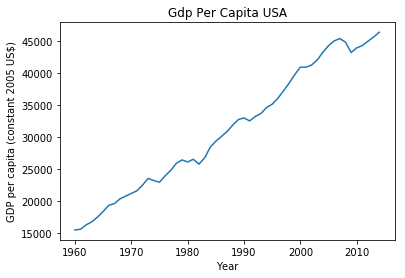

In [33]:
# switch to a line plot
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

# Label the figure
plt.title('Gdp Per Capita USA')

# to make more honest, start the y axis at 0
#plt.axis([1959,2011,9,25])

plt.show()

So although we've seen a decline in the CO2 emissions per capita, it does not seem to translate to a decline in GDP per capita

## ScatterPlot for comparing GDP against CO2 emissions (per capita)

First, we'll need to make sure we're looking at the same time frames

In [37]:
print("GDP Min Year = ", gdp_stage['Year'].min(), "max: ", gdp_stage['Year'].max())
print("CO2 Min year = ", stage['Year'].min(), "max: ", stage['Year'].max())

GDP Min Year =  1960 max:  2014
CO2 Min year =  1960 max:  2011


We have 3 extra years of GDP data, so let's trim those off so the scatterplot has equal length arrays to compare(this is required by satterplot)

In [38]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
print(len(gdp_stage_trunc))
print(len(stage))

52
52


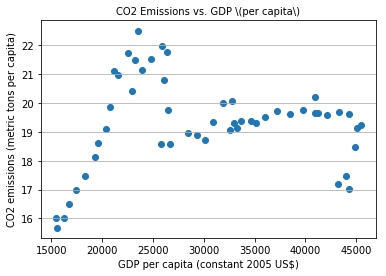

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, xtricks, XLabel, YLabel

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)', fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[0], fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc['Value']
Y = stage['Value']

axis.scatter(X, Y)
plt.show()

This doesn't look like a strong relationship. We can test this by looking at correlation

In [42]:
np.corrcoef(gdp_stage_trunc['Value'], stage['Value'])

array([[ 1.        ,  0.07676005],
       [ 0.07676005,  1.        ]])

A correlation of .07 is pretty week but you will learn more about correlation in the next course.

You could continue to explore this to see if other countries have a closer relationship between CO2 emissions and GDP. Perhaps it is stronger for developing countries.